In [1]:
# libraries import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def import_excel(file_path):
    '''
    Use r berfore file path e,g. (r'path')
    or use double back slash \\
    '''
    df = pd.read_excel(file_path)
    print("file reading successfull")
    return df

def import_csv(file_path):
    '''
    Use r berfore file path e,g. (r'path')
    or use double back slash \\
    '''
    df = pd.read_csv(file_path)
    return df


def data_frame_info(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The input must be a pandas DataFrame.")
    '''
    Input : data farame variable name

    shape return shape of fata frame
    data_type returns data type of each column 
    summary gives statistical overview of data frame
    column_names return name of columns in data frame
    null_values and na_values return count of null and NA values in columns of data frame

    '''
    info = {
        'shape': df.shape,
        
        'data_types': df.dtypes,
        
        'summary': df.describe(),
        
        'column_names': df.columns.tolist(),
        
        'null_values': df.isnull().sum(),
        
        'na_values': df.isna().sum(),
        
        'duplicated_records': df.duplicated().sum()
    }
    
    return info

def print_info(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The input must be a pandas DataFrame.")
    info = data_frame_info(df)
    for key, value in info.items():
        print(key)
        print(value,'\n')


def remove_duplicates(df):
    df = df.drop_duplicates(keep='first')
    return df


def correlation_plot(df):
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap')
    plt.show()


def distribution_plot(df , column):
    sns.displot(df,x=df[column] , kind = 'kde')
    plt.title('Distribution of ' + column)
    plt.show()

def statistical_summary(df):
    '''Calculate statistics for each numerical column'''
    stats_df = pd.DataFrame() 
    stats_df['Mean'] = df.mean()
    stats_df['Median'] = df.median()
    stats_df['Standard Deviation'] = df.std()
    stats_df['Kurtosis'] = df.kurtosis()
    stats_df['Skewness'] = df.skew()

    return stats_df

In [2]:
df =import_csv('E:\PROJECTS\ml\loan_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\vmohi\AppData\Local\Temp\ipykernel_9628\149046830.py:1: SyntaxWarning: invalid escape sequence '\P'
  df =import_csv('E:\PROJECTS\ml\loan_data.csv')


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


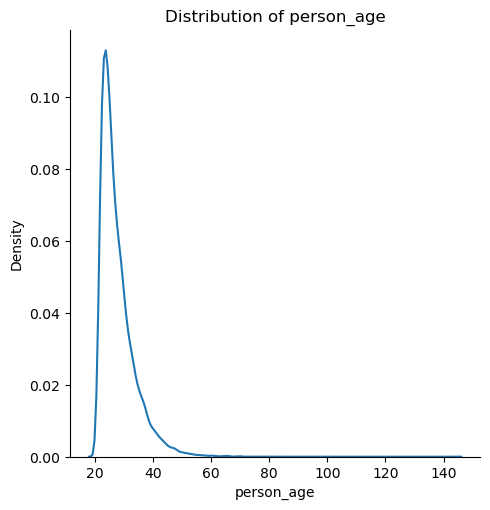

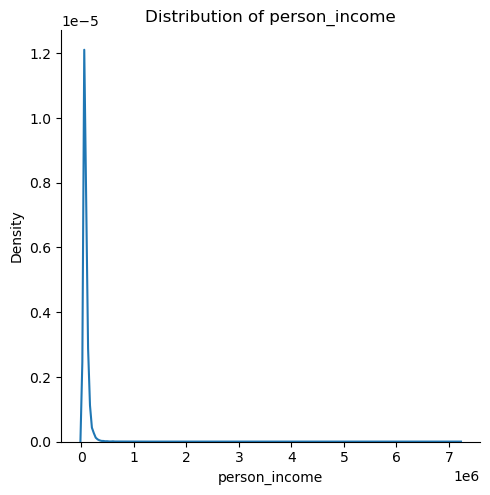

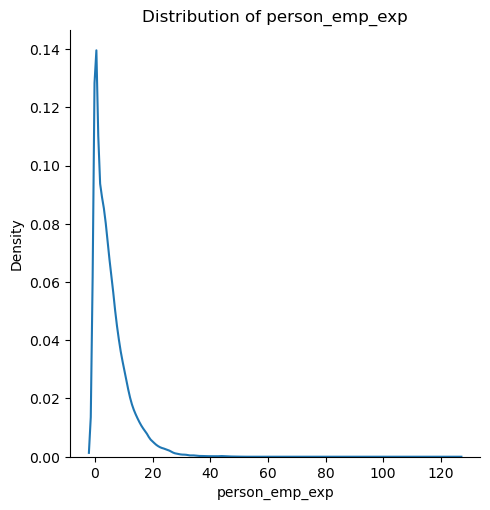

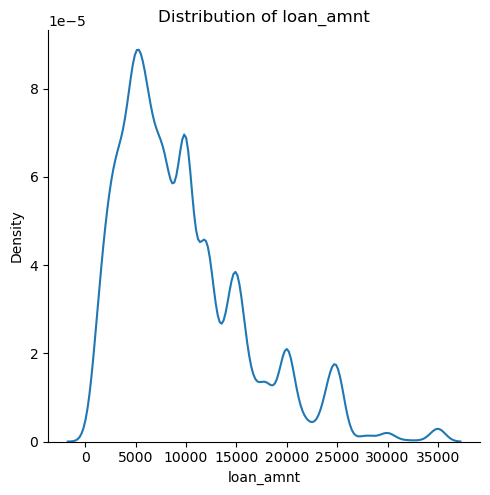

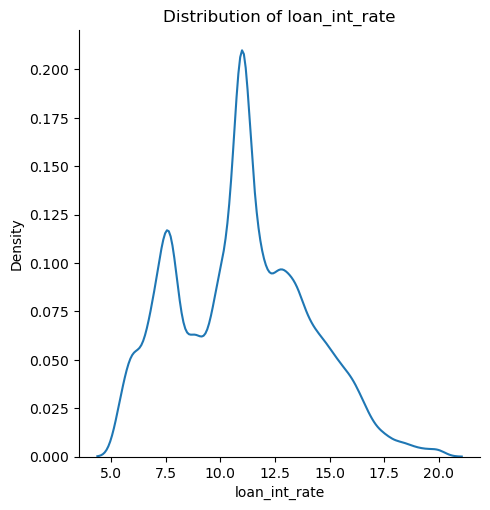

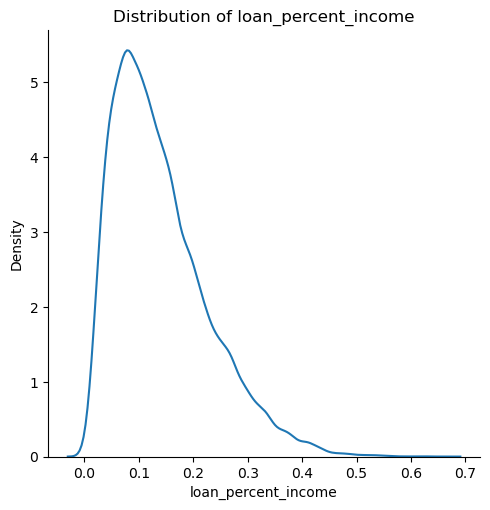

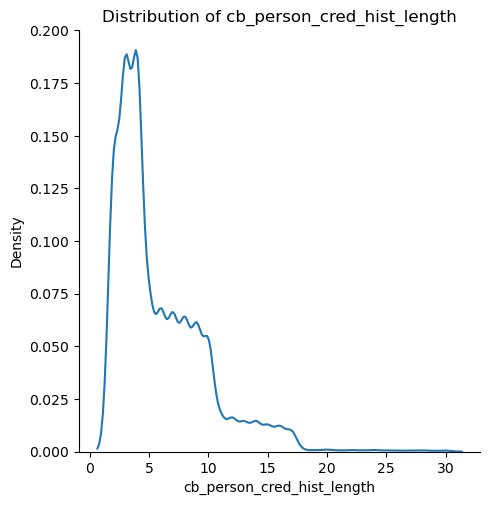

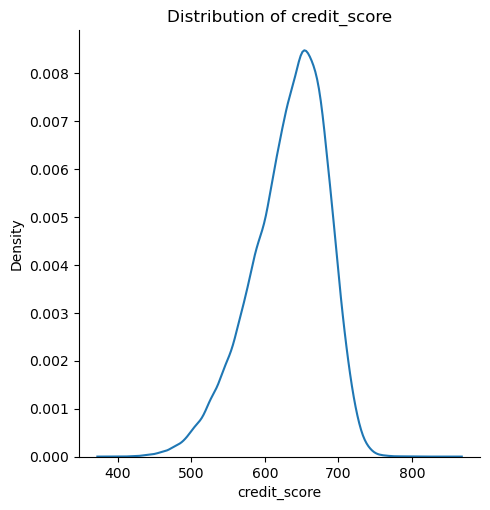

In [4]:
col=['person_age', 'person_income',
       'person_emp_exp', 'loan_amnt', 
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']
for i in col:
    distribution_plot(df , i)

In [5]:
print_info(df)

shape
(45000, 14) 

data_types
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object 

summary
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.0000

In [6]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [7]:
statistical_summary(df[['person_age', 'person_income',
       'person_emp_exp', 'loan_amnt', 
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']])

,Mean,Median,Standard Deviation,Kurtosis,Skewness
person_age,27.764178,26.00,6.045108,18.649449,2.548154
person_income,80319.053222,67048.00,80422.498632,2398.684769,34.137583
person_emp_exp,5.410333,4.00,6.063532,19.168324,2.594917
loan_amnt,9583.157556,8000.00,6314.886691,1.351215,1.179731
loan_int_rate,11.006606,11.01,2.978808,-0.420335,0.213784
loan_percent_income,0.139725,0.12,0.087212,1.082416,1.034512
cb_person_cred_hist_length,5.867489,4.00,3.879702,3.725945,1.631720
credit_score,632.608756,640.00,50.435865,0.203022,-0.610261


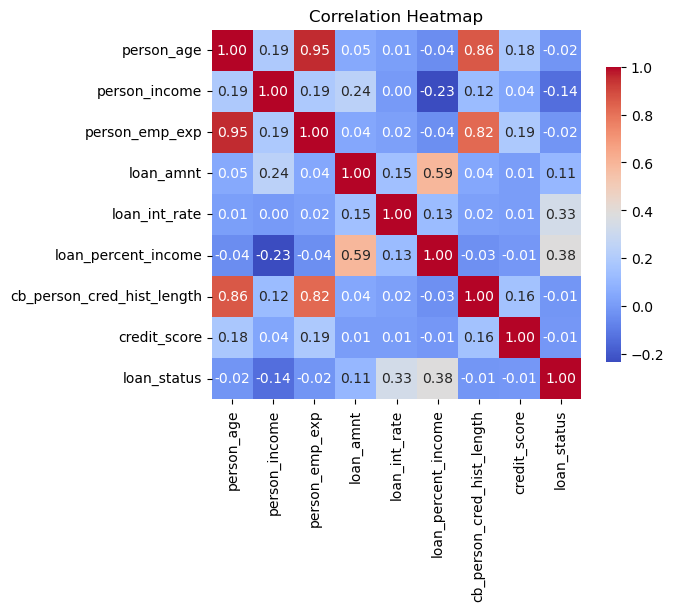

In [8]:
correlation_plot(df[['person_age', 'person_income',
       'person_emp_exp', 'loan_amnt', 
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status']])

KNN CLASSIFICATION

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8730
           1       0.77      0.71      0.74      2520

    accuracy                           0.89     11250
   macro avg       0.85      0.83      0.84     11250
weighted avg       0.89      0.89      0.89     11250



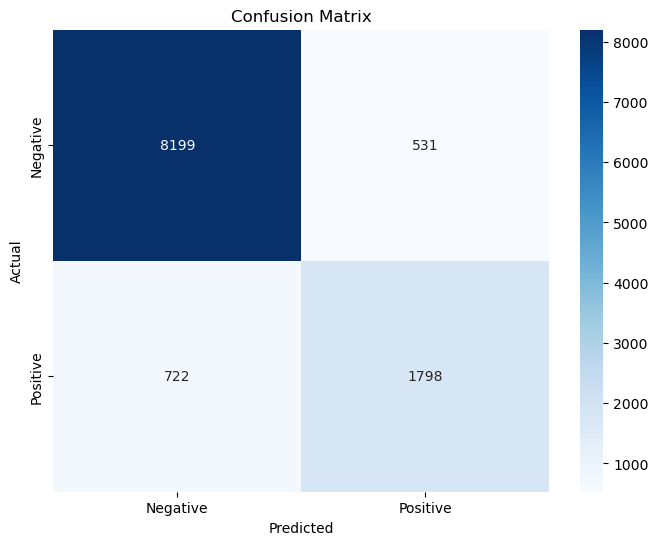

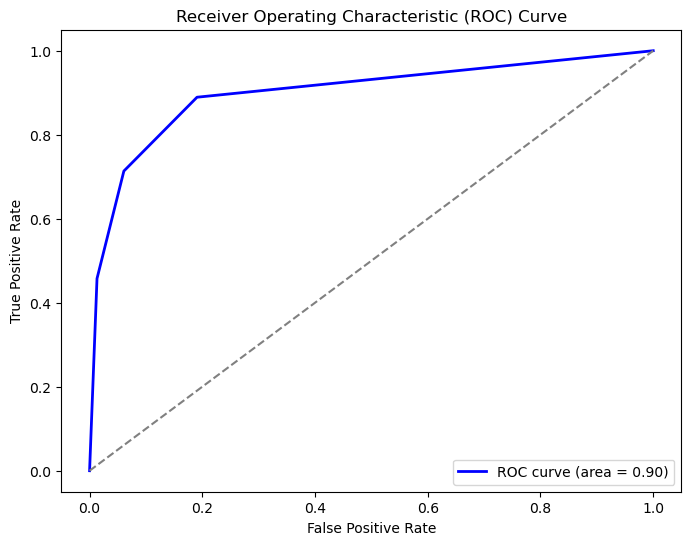

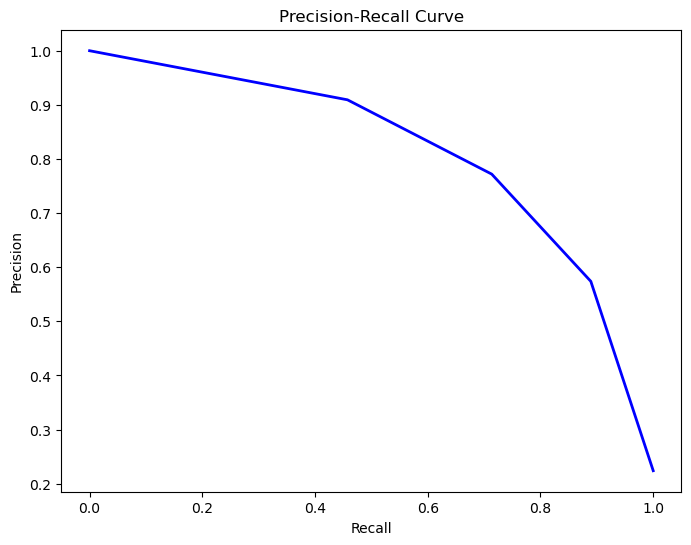

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Assuming df is your DataFrame containing the dataset

# Identifying numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop the target column (assuming it is the last column in df)
numerical_columns.remove('loan_status')  

# Identify categorical columns manually or based on the data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


# Split the data into features and target
x = df[numerical_columns + categorical_columns]  
y = df['loan_status'] 

# Train-test split (25% test size)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessing: Apply StandardScaler to numerical columns and OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  
        ('cat', OneHotEncoder(drop='first'), categorical_columns)   
    ]
)

# Pipeline with preprocessor and KNN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('knn', KNeighborsClassifier(n_neighbors=3))  
])

# Fit the model
pipeline.fit(x_train, y_train)

# Predict on the test set
predictions = pipeline.predict(x_test)
y_prob = pipeline.predict_proba(x_test)[:, 1]  

# Calculate accuracy
accuracy = pipeline.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting Confusion Matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Naive Bayes

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      8730
           1       0.47      0.97      0.64      2520

    accuracy                           0.75     11250
   macro avg       0.73      0.83      0.72     11250
weighted avg       0.87      0.75      0.77     11250



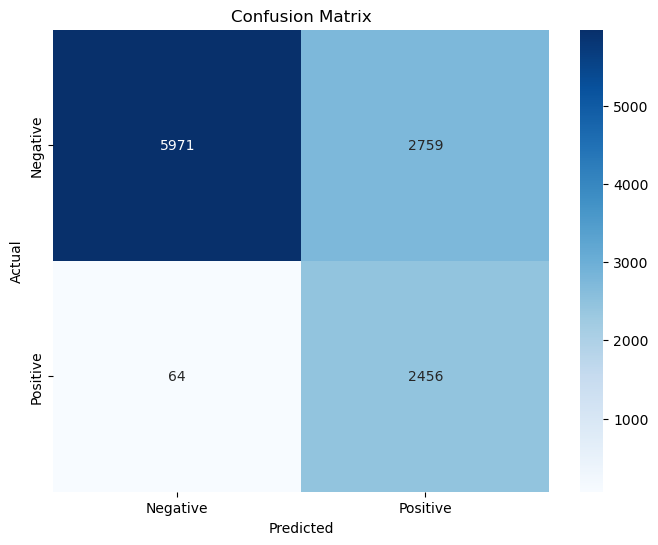

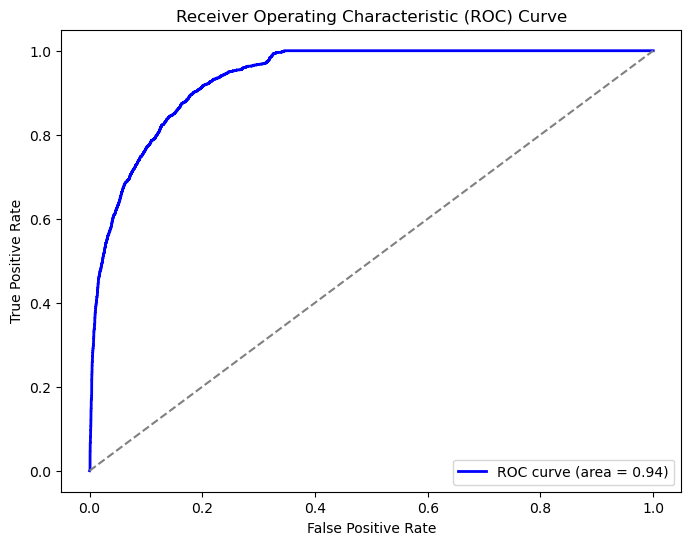

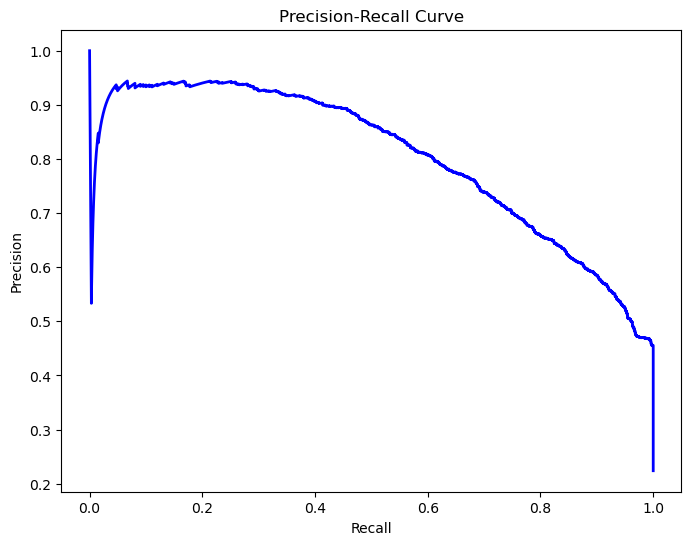

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop the target column 
numerical_columns.remove('loan_status')  

# Identify categorical columns manually or based on the data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


# Split the data into features and target
x = df[numerical_columns + categorical_columns]  # Features
y = df['loan_status']  # Target (loan_status)

# Train-test split (25% test size)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessing: Apply StandardScaler to numerical columns and OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  
    ]
)

# Pipeline with preprocessor and Naive Bayes classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('naive_bayes', GaussianNB())  
])

# Fit the model
pipeline.fit(x_train, y_train)

# Predict on the test set
predictions = pipeline.predict(x_test)
y_prob = pipeline.predict_proba(x_test)[:, 1]  # Probabilities for ROC curve

# Calculate accuracy
accuracy = pipeline.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


RANDOM FOREST

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8730
           1       0.88      0.77      0.82      2520

    accuracy                           0.93     11250
   macro avg       0.91      0.87      0.89     11250
weighted avg       0.92      0.93      0.92     11250



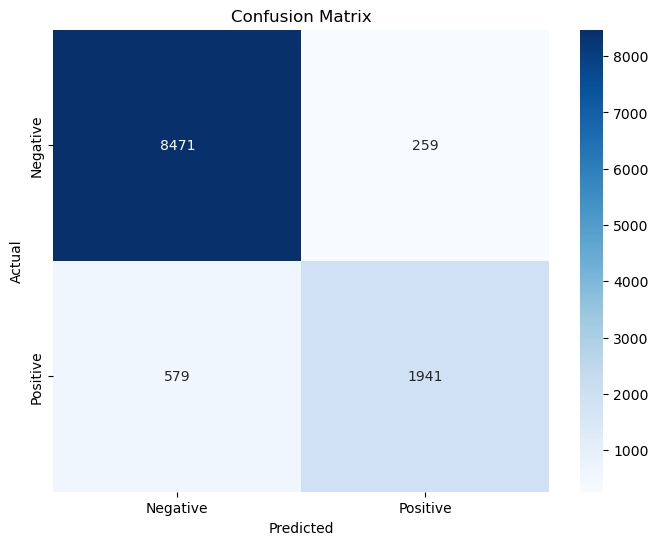

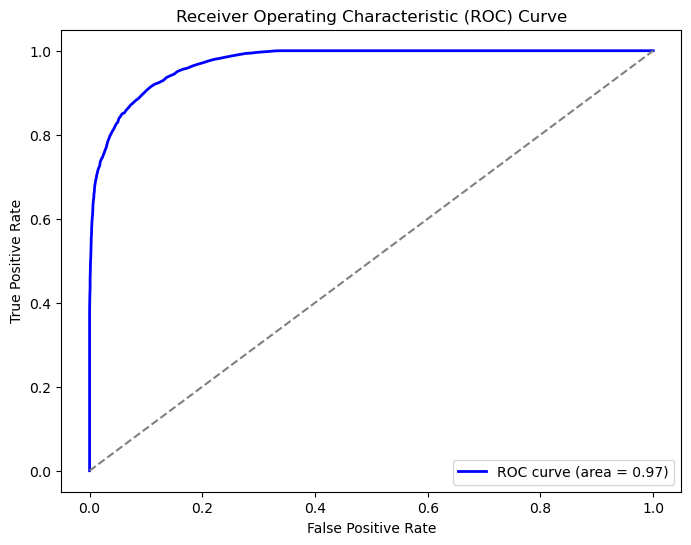

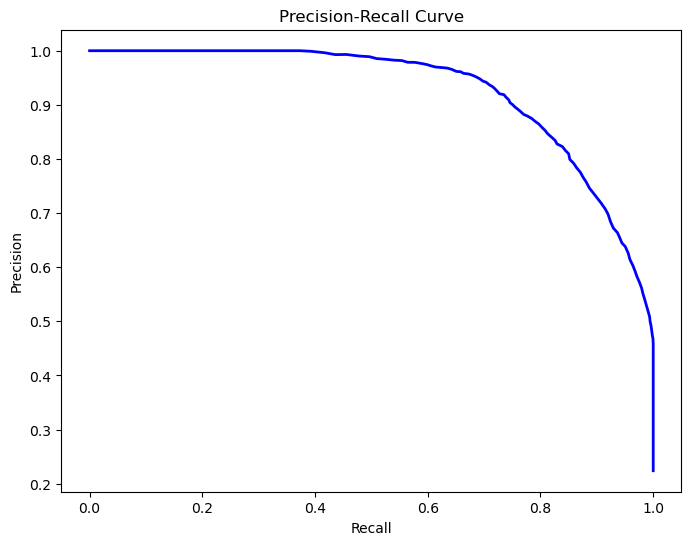

Feature Importances:
                               Feature  Importance
4                        loan_int_rate    0.147915
5                  loan_percent_income    0.141930
26  previous_loan_defaults_on_file_Yes    0.134387
25   previous_loan_defaults_on_file_No    0.123565
1                        person_income    0.113644
3                            loan_amnt    0.061979
7                         credit_score    0.053564
18          person_home_ownership_RENT    0.037539
0                           person_age    0.029743
2                       person_emp_exp    0.026870
6           cb_person_cred_hist_length    0.024515
15      person_home_ownership_MORTGAGE    0.018684
17           person_home_ownership_OWN    0.009302
21         loan_intent_HOMEIMPROVEMENT    0.008461
19       loan_intent_DEBTCONSOLIDATION    0.007845
22                 loan_intent_MEDICAL    0.007739
24                 loan_intent_VENTURE    0.006790
20               loan_intent_EDUCATION    0.005837
11        

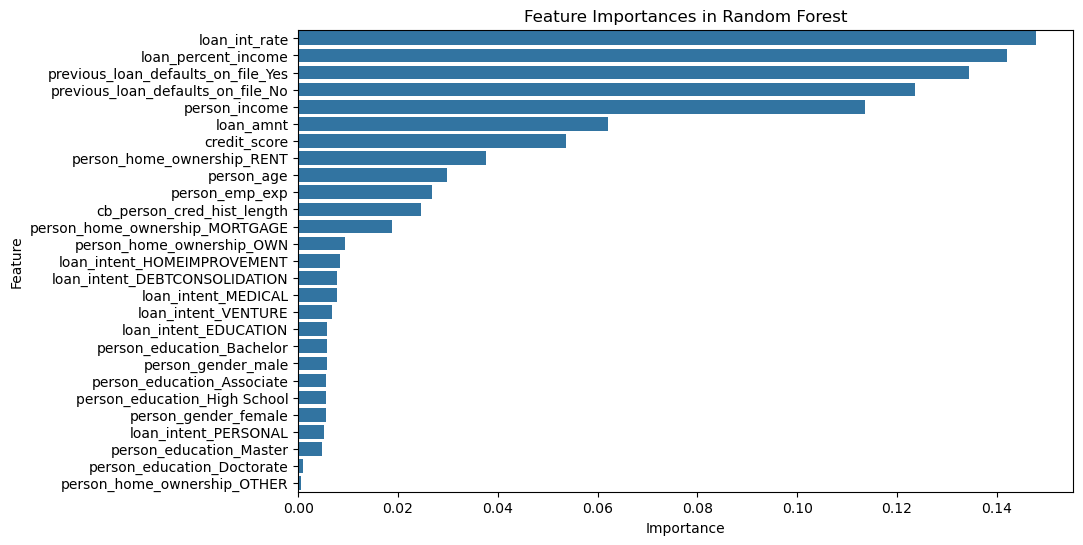

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


numerical_columns.remove('loan_status')  # Assuming 'loan_status' is the target column



x = df[numerical_columns + categorical_columns]  # Features
y = df['loan_status']  # Target (loan_status)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns), 
        ('cat', OneHotEncoder(), categorical_columns)   
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))  
])


pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)
y_prob = pipeline.predict_proba(x_test)[:, 1]  


accuracy = pipeline.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


rf_model = pipeline.named_steps['rf']
feature_importances = rf_model.feature_importances_


encoded_feature_names = numerical_columns + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns))


feature_importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("Feature Importances:")
print(feature_importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest')
plt.show()
